In [25]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

classifier = Sequential()

classifier.add(Input(shape=(128, 128, 3), name='input'))

# 4 conv and pooling layers
classifier.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='conv4'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

# fcl
classifier.add(Dense(units=128, activation='relu', name='fcl'))
classifier.add(Dense(units=1, activation='sigmoid', name='output'))

# logging the initiated random kernels from first conv layer 
def log_initial_kernels(model):
    for layer in model.layers:
        if layer.name == 'conv1':
            kernels, biases = layer.get_weights()
            print(f"Layer {layer.name} initial kernels:")
            for i in range(kernels.shape[-1]):
                kernel_matrix = kernels[:, :, :, i]
                print(f"Kernel {i+1}:\n{kernel_matrix}\n")

log_initial_kernels(classifier)

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Layer conv1 initial kernels:
Kernel 1:
[[[ 0.00595078  0.10963936 -0.1096926 ]
  [-0.10252802  0.03492996 -0.09406254]
  [-0.11891718 -0.00706758  0.11993845]]

 [[-0.11213236  0.01555631 -0.05465048]
  [ 0.09837908 -0.10768513 -0.07389711]
  [-0.07235673 -0.13383366  0.09175003]]

 [[-0.13165401  0.08254036  0.01113176]
  [-0.13071533 -0.11219156  0.10406396]
  [ 0.10447536  0.03013831 -0.0889027 ]]]

Kernel 2:
[[[ 0.13132425  0.11898391 -0.10072621]
  [-0.06115443  0.06908263  0.00386837]
  [ 0.12691803  0.07966043 -0.09087537]]

 [[ 0.10922001  0.00436233  0.08529378]
  [ 0.12759711  0.04358084 -0.13467942]
  [-0.05674642  0.10024264  0.02519557]]

 [[-0.13056493 -0.07027806  0.10826251]
  [ 0.11679815 -0.00082065 -0.0564282 ]
  [ 0.0253294   0.11822884 -0.1060492 ]]]

Kernel 3:
[[[-0.05623307 -0.02401912  0.08553162]
  [ 0.01515274  0.05602778 -0.02085318]
  [ 0.09031717 -0.03733806  0.06533931]]

 [[-0.11265535  0.084875   -0.12599364]
  [-0.07248378 -0.09268515  0.12250434]
  [ 0

In [38]:
# Image preprocessing-fitting the CNN to image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# datagen doesnt regenerate images from the original data
training_set = train_datagen.flow_from_directory(r'C:\Users\probi\Downloads\Naani\Dataset\Train',
                                                 target_size=(128, 128),
                                                 batch_size=9,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\probi\Downloads\Naani\Dataset\Test',
                                             target_size=(128, 128),
                                             batch_size=9,
                                             class_mode='binary')

history = classifier.fit(training_set,
                          steps_per_epoch=575,
                          epochs=10,
                          validation_data=test_set,
                          validation_steps=119)

# history = classifier.fit(training_set,
#                        steps_per_epoch=len(training_set),
#                        epochs=10,  
#                        validation_data=test_set,
#                        validation_steps=len(test_set),
#                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

model_save_path = r'C:\Users\probi\Downloads\Naani\model.h5'
classifier.save(model_save_path)

print("Model saved successfully at:", model_save_path)

Found 8068 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Epoch 1/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 65s 112ms/step - accuracy: 0.9040 - loss: 0.2424 - val_accuracy: 0.9132 - val_loss: 0.2215
Epoch 2/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 36s 62ms/step - accuracy: 0.9339 - loss: 0.1658 - val_accuracy: 0.9452 - val_loss: 0.1424
Epoch 3/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 65s 112ms/step - accuracy: 0.9424 - loss: 0.1450 - val_accuracy: 0.9178 - val_loss: 0.1957
Epoch 4/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 36s 62ms/step - accuracy: 0.9554 - loss: 0.1236 - val_accuracy: 0.9452 - val_loss: 0.1463
Epoch 5/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 65s 112ms/step - accuracy: 0.9587 - loss: 0.1096 - val_accuracy: 0.9440 - val_loss: 0.1495
Epoch 6/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 34s 60ms/step - accuracy: 0.9686 - loss: 0.0813 - val_accuracy: 0.9395 - val_loss: 0.1780
Epoch 7/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 62s 107ms/step - accuracy: 0.9573 - loss: 0.1148 - val_accuracy: 0.9617 - val_loss: 0.1150
Ep

Model saved successfully at: C:\Users\probi\Downloads\Naani\model.h5


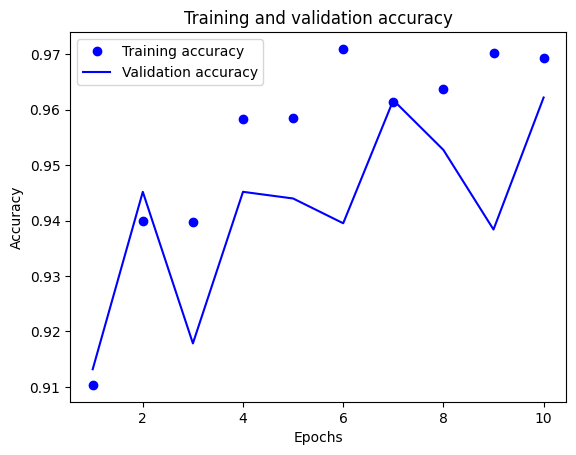

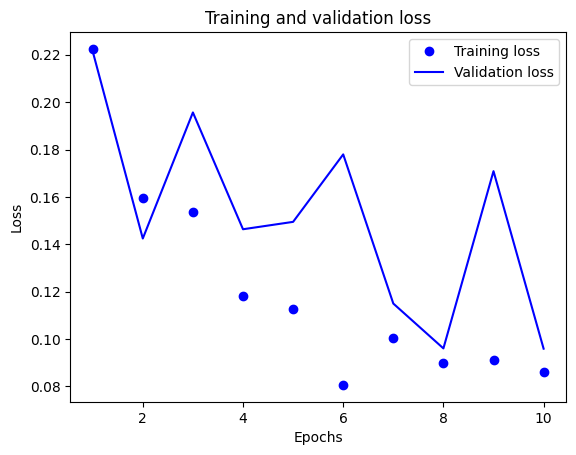

In [39]:
import matplotlib.pyplot as plt

# accuracy graprh
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# loss graphh
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image

model_path = r'C:\Users\probi\Downloads\Naani-server\model.h5'
model = load_model(model_path)

test_image_path = r'C:\Users\probi\Downloads\Naani-server\test.png'  
test_image = image.load_img(test_image_path, target_size=(128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image /= 255. 

prediction = model.predict(test_image)

prediction_score = prediction[0][0]
if prediction_score > 0.5:
    result = 'normal'
else:
    result = 'cataract'

print("Prediction:", result)
print("Prediction Score:", prediction_score)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Prediction: normal
Prediction Score: 0.9995457


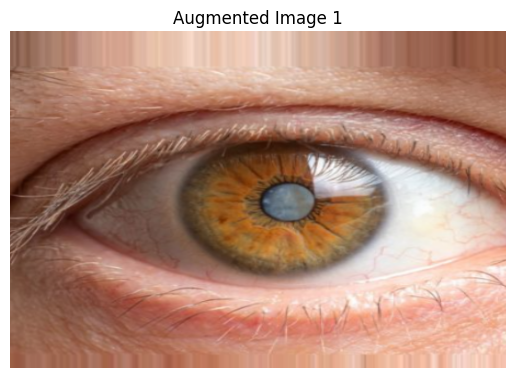

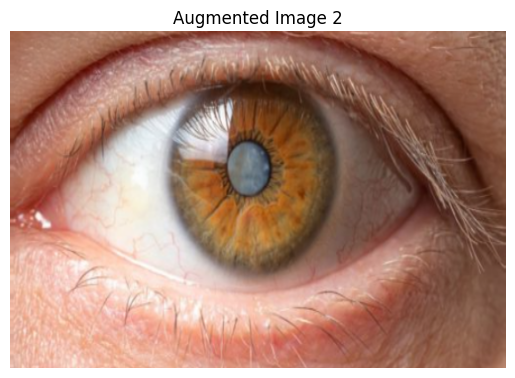

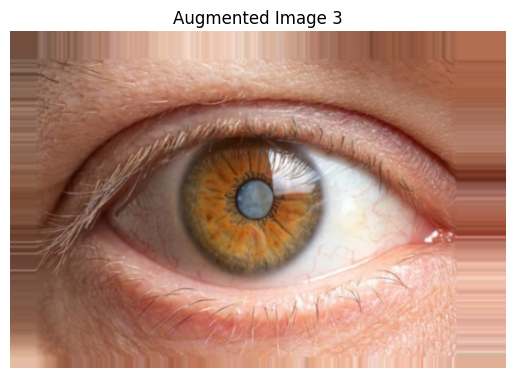

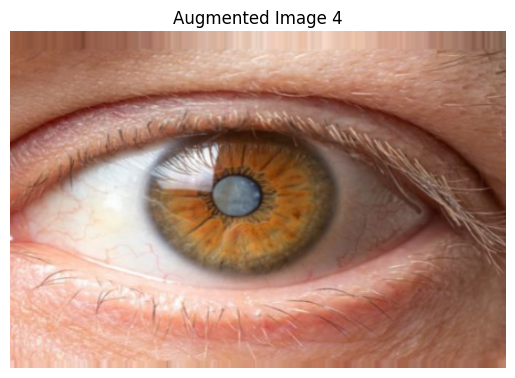

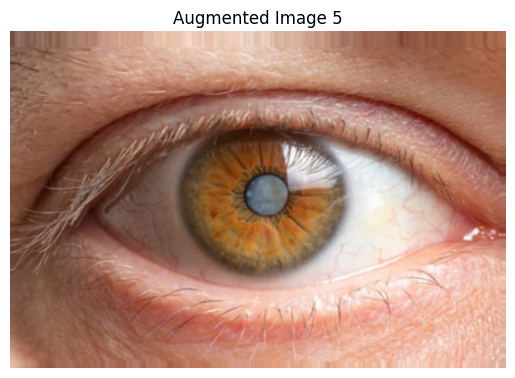

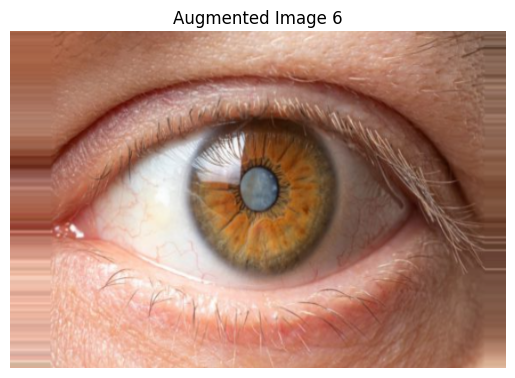

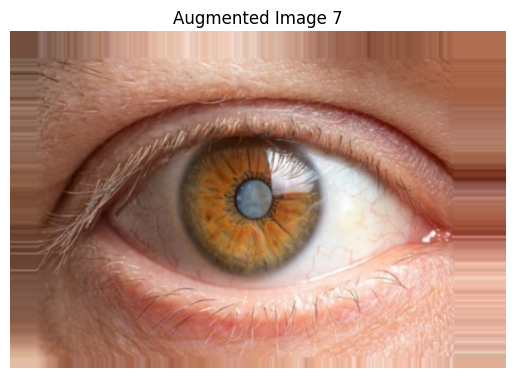

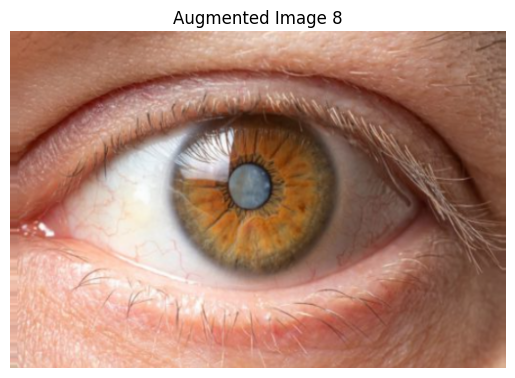

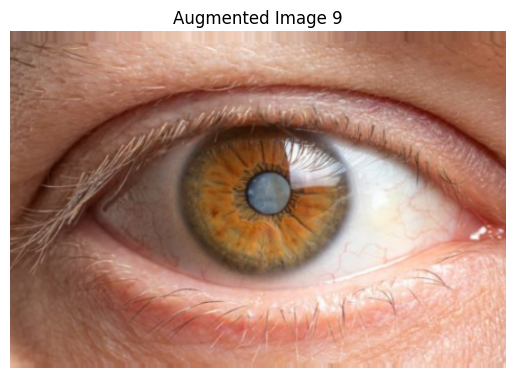

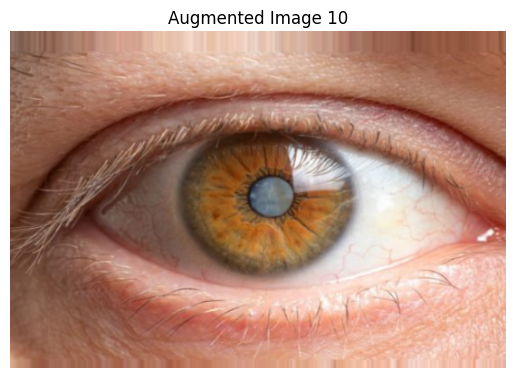

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

test_image_path = r'C:\Users\probi\Downloads\Naani-server\maincataract.png'

img = load_img(test_image_path)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

aug_iter = datagen.flow(x, batch_size=1)

output_dir = r'C:\Users\probi\Downloads\Naani-server\augmented_images'
os.makedirs(output_dir, exist_ok=True)

for i in range(10):
    augmented_img = next(aug_iter)[0]
    augmented_img *= 255  
    augmented_img = np.clip(augmented_img, 0, 255).astype('uint8')  
    aug_img_path = os.path.join(output_dir, f'augmented_image_{i+1}.png')
    array_to_img(augmented_img).save(aug_img_path)

    plt.figure()
    plt.imshow(array_to_img(augmented_img))
    plt.axis('off')
    plt.title(f'Augmented Image {i+1}')
    plt.show()


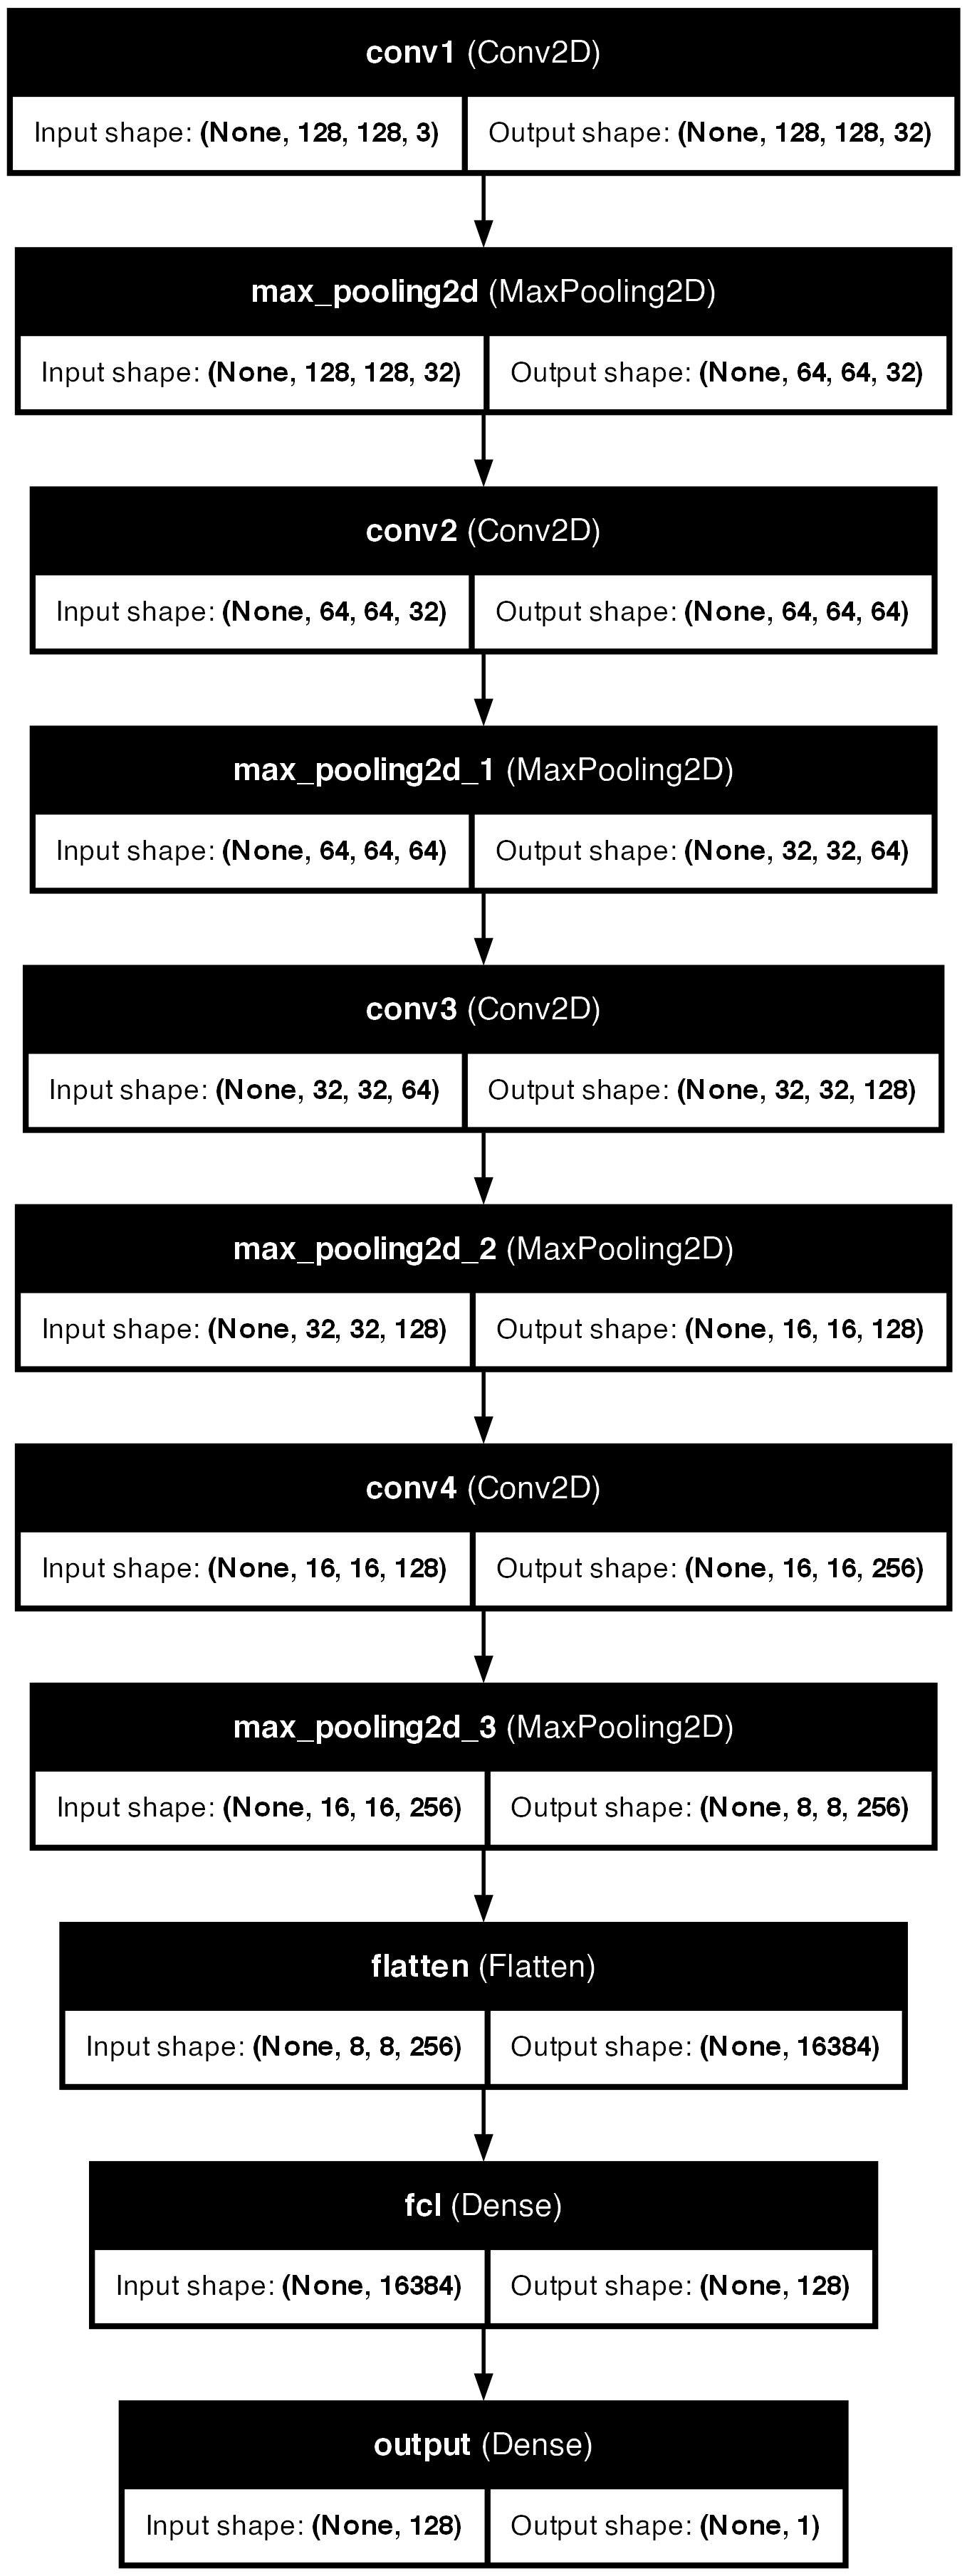

In [10]:
from keras.utils import plot_model
from keras.models import load_model

# Load your model
model_path = r'C:\Users\probi\Downloads\Naani\model.h5'
model = load_model(model_path)

# Plot the model
plot_model(model, to_file='nanni_architecture.png', show_shapes=True, show_layer_names=True)
